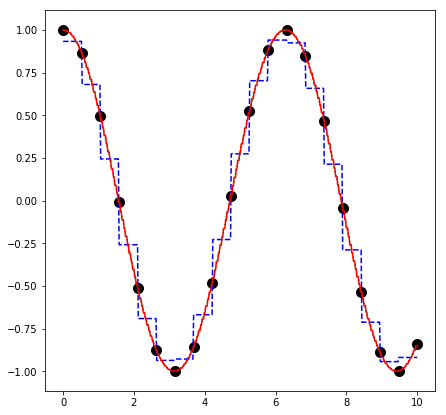

In [2]:
import numpy as np
from numpy import linalg as lin
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd

k = 2
n = 20

X = np.linspace( 0, 10, n, endpoint = True )
y = np.cos( X )

def kNNReg( x ):
    diff = X - x
    dist = [abs(d) for d in diff]
    idx = np.argsort( dist )
    yhat = 0
    for i in range( k ):
        yhat = yhat + y[idx[i]]
    return yhat/k

fig = pd.getFigure()
# Show where the training points lie
pd.plot2D( np.hstack( (X[:, np.newaxis], y[:, np.newaxis]) ), fig, color = 'k', marker = 'o', size = 100 )
# Plot the true curve
pd.plotCurve( np.cos, fig, color = 'g', line = ":" )
# Plot what kNN predicts with 20 training points
pd.plotCurve( kNNReg, fig, color = 'b', line = "--" )

# kNN does much better with larger number of training points. Indeed it is a universally consistent learning algorithm
# kNN offers us a piecewise constant curve as its approximation to the true curve
# With n = 200 the number of pieces is so large that it starts looking like a continuous function
n = 200
X = np.linspace( 0, 10, n, endpoint = True )
y = np.cos( X )
pd.plotCurve( kNNReg, fig, color = 'r', line = "-" )

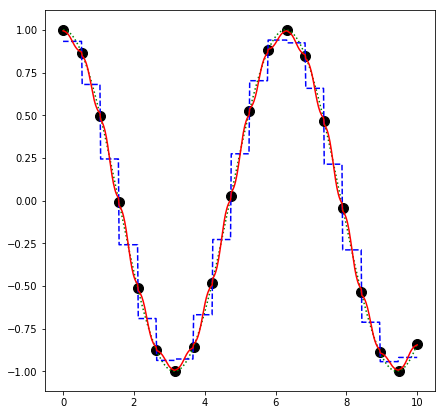

In [3]:
n = 20
X = np.linspace( 0, 10, n, endpoint = True )
y = np.cos( X )

def wkNNReg( x ):
    diff = X - x
    dist = [abs(d) for d in diff]
    idx = np.argsort( dist )
    yhat = 0
    wsum = 0
    for i in range( k ):
        yhat = yhat + y[idx[i]] * np.exp( -6 * dist[idx[i]] )
        wsum = wsum + np.exp( -6 * dist[idx[i]] )
    return yhat/wsum

fig2 = pd.getFigure()
# Show where the training points lie
pd.plot2D( np.hstack( (X[:, np.newaxis], y[:, np.newaxis]) ), fig2, color = 'k', marker = 'o', size = 100 )
# Plot the true curve
pd.plotCurve( np.cos, fig2, color = 'g', line = ":" )
# Plot what kNN predicts with 20 training points
pd.plotCurve( kNNReg, fig2, color = 'b', line = "--" )
# Weighted kNN is able to do far better with just 20 data points (comparable to kNN with 200 data points)
pd.plotCurve( wkNNReg, fig2, color = 'r', line = "-" )

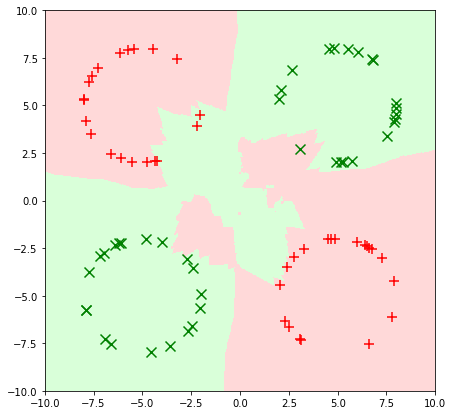

In [4]:
d = 2 
n = 20
r = 3
k = 50

fig3 = pd.getFigure()

tmp1 = gsd.genSphericalData( d, n, [-5, 5], r )
tmp2 = gsd.genSphericalData( d, n, [5, -5], r )
XPos = np.vstack( (tmp1, tmp2) )
yPos = np.ones( (2*n,) )

tmp1 = gsd.genSphericalData( d, n, [5, 5], r )
tmp2 = gsd.genSphericalData( d, n, [-5, -5], r )
XNeg = np.vstack( (tmp1, tmp2) )
yNeg = -np.ones( (2*n,) )

X = np.vstack( (XPos, XNeg) )
y = np.concatenate( (yPos, yNeg) )

def kNNClass( xt, yt ):
    diff = X - np.array( [xt, yt] )
    dist = lin.norm( diff, axis = 1 )
    idx = np.argsort( dist )
    yhat = 0
    wsum = 0
    for i in range( k ):
        yhat = yhat + y[idx[i]]
    return yhat/k

# kNN can behave weirdly with very large values of k
# The value of k should be tuned carefully using validation (held out/cross)
pd.shade2D( kNNClass, fig3, mode = 'point', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig3, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig3, color = 'g', marker = 'x' )